In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [180]:
df = pd.read_csv('Data/cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### 2.0 - EDA uppvärmning

##### a)

Text(-0.16, -0.48, '34979')

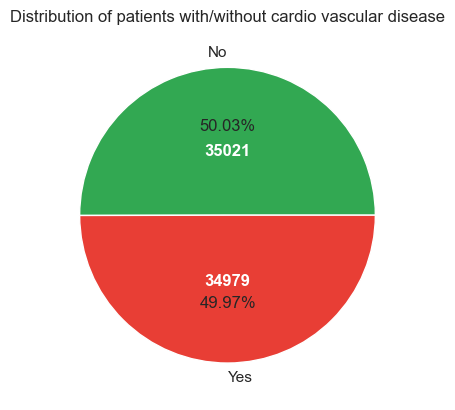

In [181]:
cardio_distribution = df['cardio'].value_counts()

# Create the pie chart
plt.pie(
    x=cardio_distribution,
    labels=['No', 'Yes'],
    autopct='%1.2f%%',
    colors=["#32a852", "#e83e35"]
);

plt.title('Distribution of patients with/without cardio vascular disease')

# Add the value count to each slice
plt.text(-0.16, 0.4, f'{cardio_distribution[0]}', color='white', fontweight='bold')
plt.text(-0.16, -0.48, f'{cardio_distribution[1]}', color='white', fontweight='bold')

##### b)

Text(0.5, 1.0, 'Distribution of patient cholesterol status')

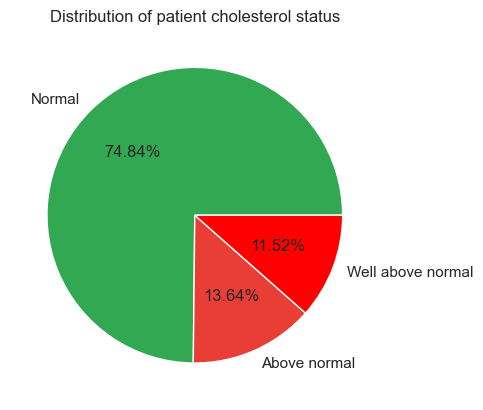

In [182]:
plt.pie(
    x=df['cholesterol'].value_counts(),
    labels=['Normal', 'Above normal', 'Well above normal'],
    colors=["#32a852", "#e83e35", 'red'],
    autopct='%1.2f%%'
);

plt.title('Distribution of patient cholesterol status')

##### c)

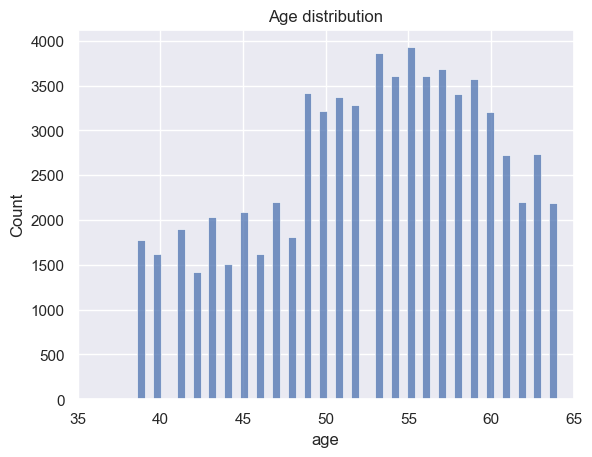

In [183]:
ax = sns.histplot(x=df['age'].div(365).astype('int'))
ax.set_title("Age distribution")
ax.set_xlim(35, 65);

##### d)

Text(0.5, 1.0, 'Distribution of smokers vs none smoker')

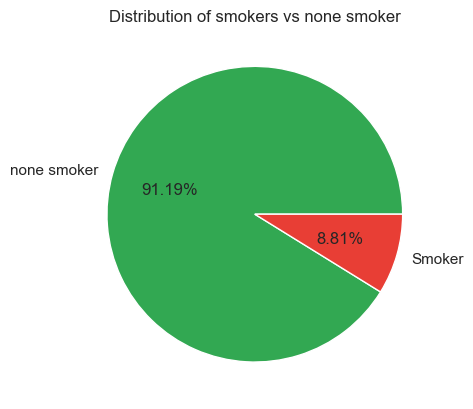

In [184]:
plt.pie(
    x=df['smoke'].value_counts(),
    labels=['none smoker', 'Smoker'],
    colors=["#32a852", "#e83e35"],
    autopct='%1.2f%%'
);

plt.title('Distribution of smokers vs none smoker')

##### e)

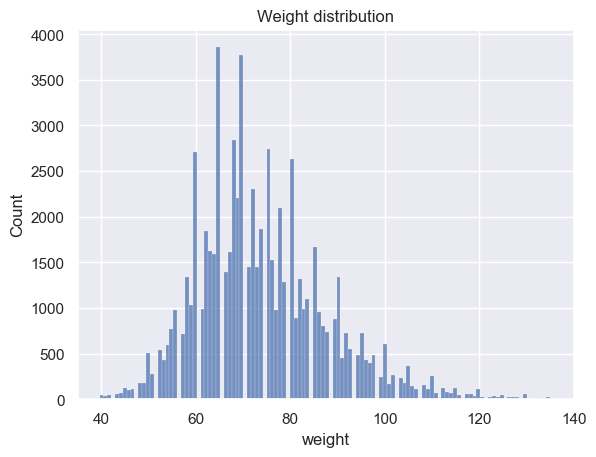

In [185]:
ax = sns.histplot(data=df, x='weight')
ax.set_title("Weight distribution")
ax.set_xlim(35, 140);

##### f)

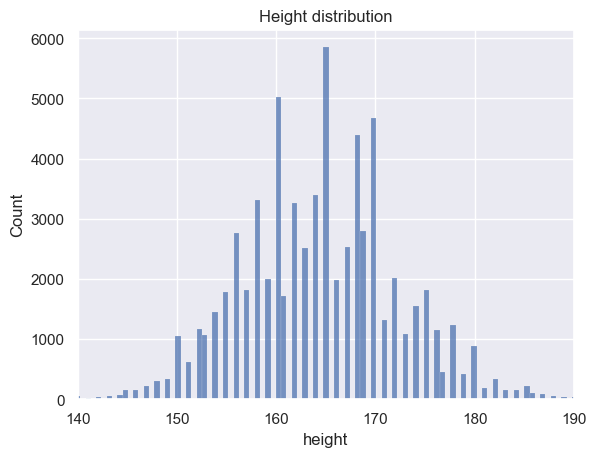

In [186]:
ax = sns.histplot(data=df, x='height')
ax.set_title("Height distribution")
ax.set_xlim(140, 190);

##### g)

In [277]:
gender_cardio = df.groupby('gender', as_index=False)['cardio'].value_counts()
display(gender_cardio)

gender_cardio = gender_cardio['count']

,gender,cardio,count
0,1,0,22914
1,1,1,22616
2,2,1,12363
3,2,0,12107


In [293]:
# Female/male cardio cases divided by total patient count
female_cardio_proportion = int(gender_cardio[2] / sum(gender_cardio[0:2]) * 100)
male_cardio_proportion = int(gender_cardio[3] / sum(gender_cardio[2:4]) * 100)

test = np.array((male_cardio_proportion, female_cardio_proportion))

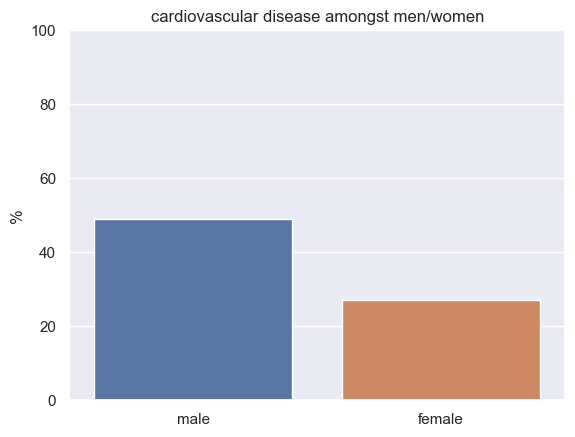

In [296]:
ax = sns.barplot(x=['male', 'female'], y=test)
ax.set_title("cardiovascular disease amongst men/women")
ax.set_ylabel("%")
ax.set_ylim(0, 100);

### 2.1.0 - Feature engineering BMI